In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.append('../')
from src.models import evaluate_model, DataSplitDict
from src.preprocessing import set_types_encoded

# Load and preprocess data
original_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/original_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/original_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv')
)

pca_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_train.csv')),
    y_train=pd.read_csv('../data/processed/PCA/pca_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_test.csv')),
    y_test=pd.read_csv('../data/processed/PCA/pca_y_test.csv')
)

# Standardize features
original_data['X_train'] = original_data['X_train'].apply(pd.to_numeric, errors='coerce')
original_data['X_test'] = original_data['X_test'].apply(pd.to_numeric, errors='coerce')


## Supervised Learning

/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


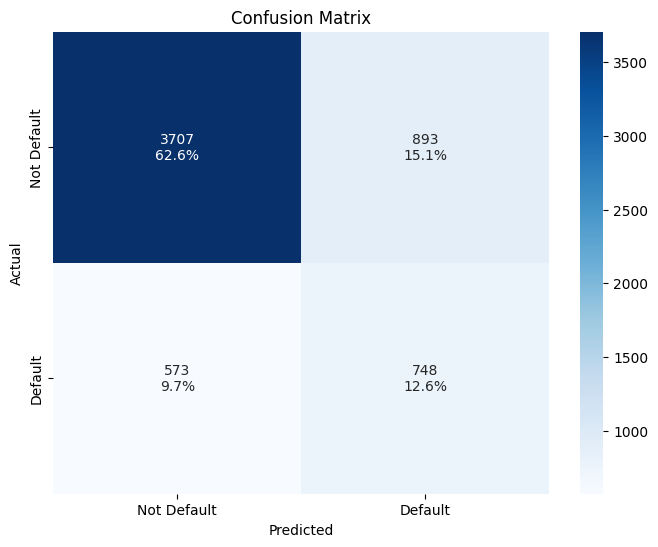

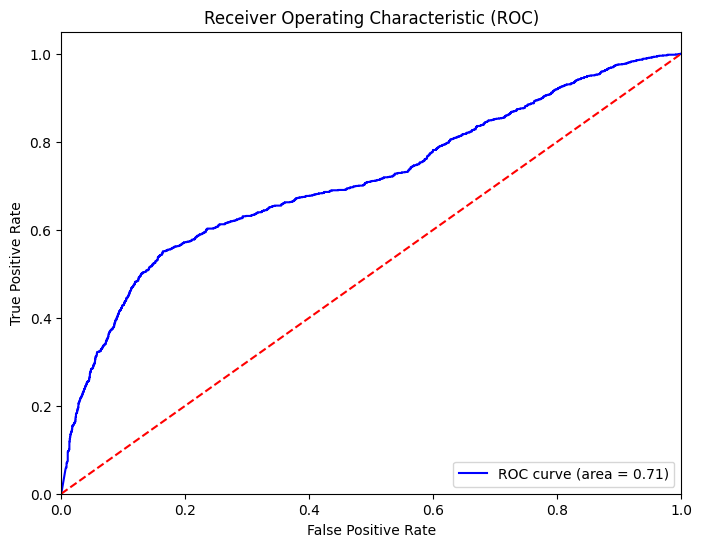

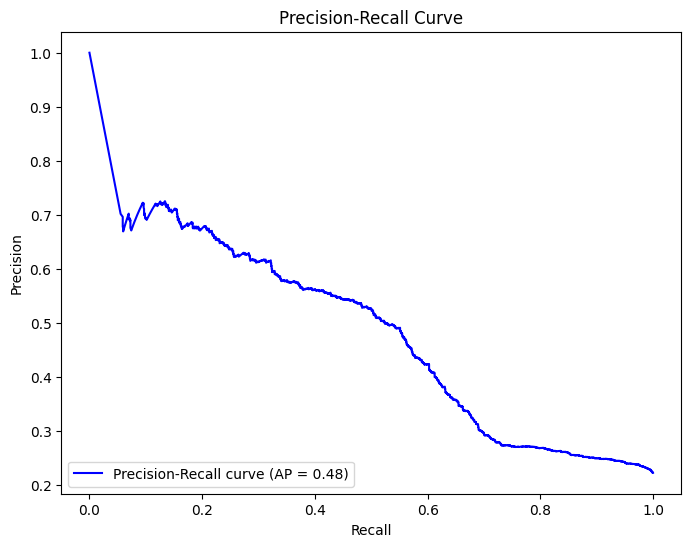

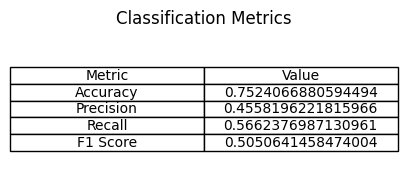

Results for Naive Bayes Classifier on Original Data:


In [ ]:
from src.models import NaiveBayesClassifier

results = NaiveBayesClassifier(original_data, plotsQ=False, save_path='plots/models/NaiveBayes/pca/')
print("Results for Naive Bayes Classifier on Original Data:")

/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Best n_neighbors: 27
Best cross-validated accuracy: 0.7769003378378377


/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


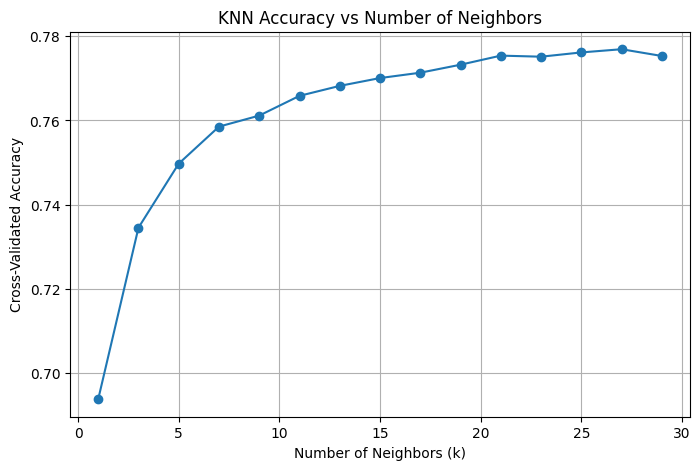

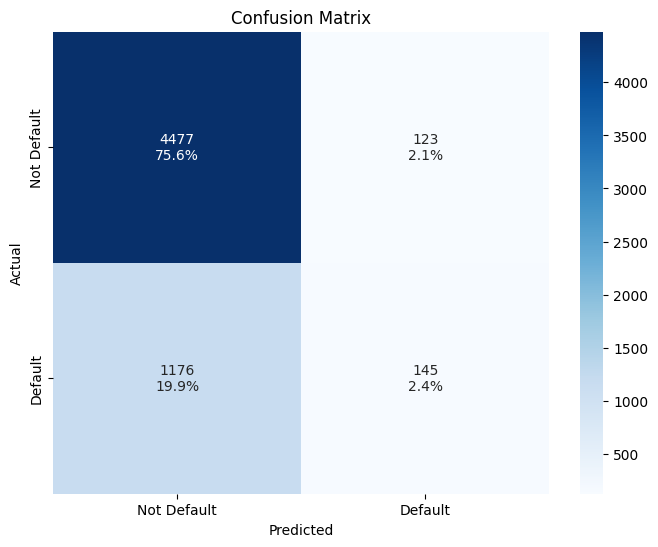

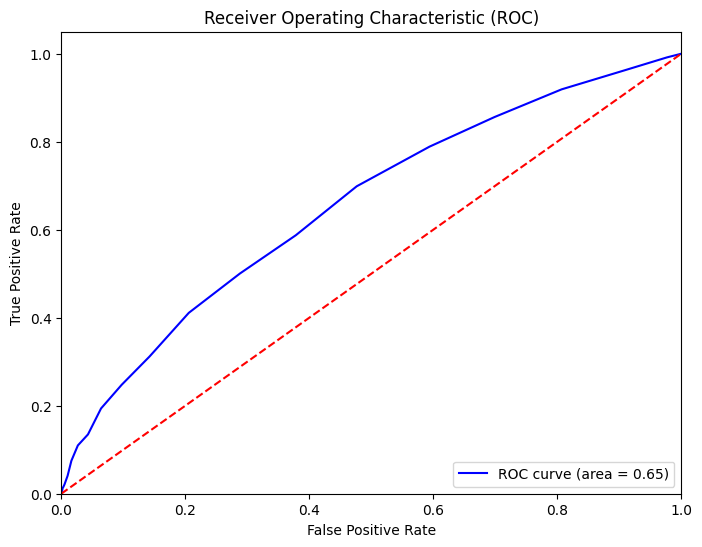

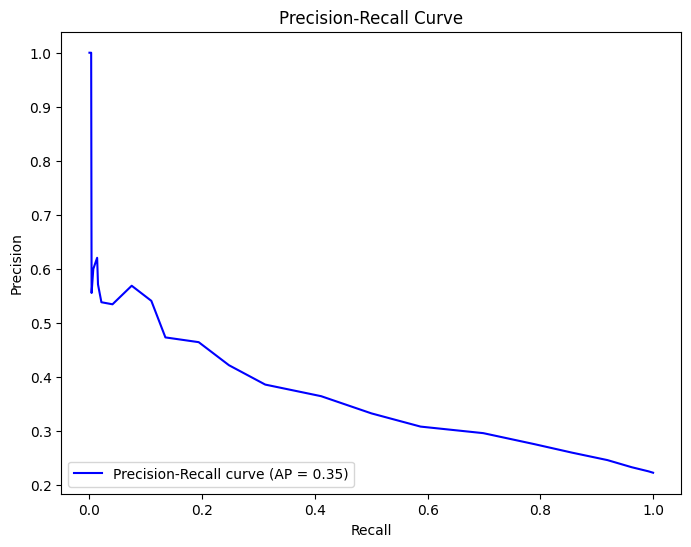

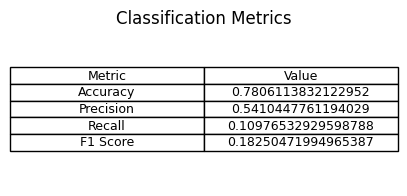

KNN results: (KNeighborsClassifier(n_neighbors=27), {'confusion_matrix': array([[4477,  123],
       [1176,  145]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.79      0.97      0.87      4600\n           1       0.54      0.11      0.18      1321\n\n    accuracy                           0.78      5921\n   macro avg       0.67      0.54      0.53      5921\nweighted avg       0.74      0.78      0.72      5921\n', 'actual_default_rate': default payment next month    0.223104
dtype: float64, 'predicted_default_rate': np.float64(0.045262624556662724), 'roc_curve': {'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.69565217e-04,
       1.30434783e-03, 2.39130435e-03, 3.26086957e-03, 5.21739130e-03,
       1.02173913e-02, 1.63043478e-02, 2.67391304e-02, 4.30434783e-02,
       6.41304348e-02, 9.73913043e-02, 1.42391304e-01, 2.05652174e-01,
       2.88043478e-01, 3.78260870e-01, 4.76521739e-01, 5.93913043e-01,
      

In [3]:
# Apply K-Nearest Neighbors (KNN) for credit card default prediction

from src.models import KNNClassifier

results = KNNClassifier( original_data, test_cases_n=list(range(1, 30, 2)), plotsQ=True, save_path='../plots/models/KNN/original/')
print("KNN results:", results)

## Decision Trees